## 作业：运用最近邻分类器对Fashion MNIST数据进行分类

   -  由于数据量大，我们仅对Fashion MNIST的测试集进行分类实验
   -  Fashion MNIST测试集： 数据包含十类，每类1000个样本，每个样本为28 * 28 的图像
   -  实验要求：对数据集划分训练集和验证集
   -  用训练集使用sklearn的KNeighborsClassifier训练的到分类器
   -  用得到的分类器对验证集的数据进行分类，得到准确率

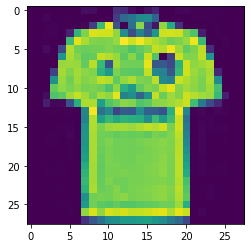

0.0
(10000, 784) (10000,)


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw):
    y = raw[:, 0] # 第1列为标签，其余为图片数据
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, y

fashion_file = f"fashion-mnist_test.csv"
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data)
im = x[0]
plt.imshow((im.squeeze()))
plt.show()
print(y[0])
# 数据与标签 
Data = np.squeeze(x).reshape(10000,28*28)
label = y
print(Data.shape, label.shape)

In [26]:
# your code is here
# 用训练集使用sklearn的KNeighborsClassifier训练的到分类器
x_train, x_test, y_train, y_test=train_test_split(Data, label, train_size=0.8, random_state=44)

from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 1
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [27]:
y_predict = knn_classifier.predict(x_test)
accuracy = sum(y_predict==y_test)/len(y_test)*100
print('accuracy:', accuracy, "%")

accuracy: 81.5 %


In [28]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[161   1   4   0   1   0  20   1   3   0]
 [  2 187   1   5   0   0   0   0   0   0]
 [  6   0 132   1  32   0  22   0   1   0]
 [  8   1   3 174   8   0  11   0   1   0]
 [  0   1  35   3 134   0  19   0   1   0]
 [  1   0   0   1   0 140   0  27   2  17]
 [ 35   0  28   7  22   0 117   0   2   0]
 [  0   0   0   0   0   4   0 198   0  11]
 [  3   0   4   0   4   1   2   0 195   0]
 [  0   0   0   0   0   1   0   7   0 192]]
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       191
         1.0       0.98      0.96      0.97       195
         2.0       0.64      0.68      0.66       194
         3.0       0.91      0.84      0.88       206
         4.0       0.67      0.69      0.68       193
         5.0       0.96      0.74      0.84       188
         6.0       0.61      0.55      0.58       211
         7.0       0.85      0.93      0.89       213
         8.0       0.95      0.93      0.94       209
         9.0       0.87     